In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import numpy as np
import cv2
import numpy as np
import random as rand
from IPython.display import Image, display # Display images
print(os.listdir('/content/drive/My Drive/flowers'))

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['sunflower', 'rose', 'tulip', 'daisy', 'dandelion']


/content/drive/My Drive/flowers/sunflower/9610098411_f1613c8e14.jpg
Name of Flower:  sunflower ↓ at index:  452


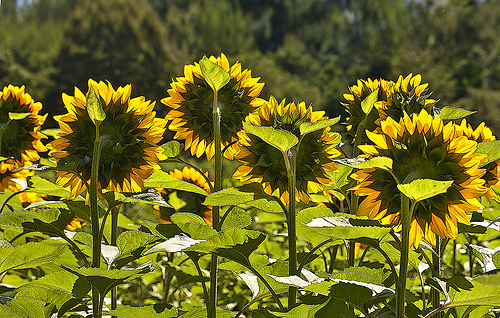

/content/drive/My Drive/flowers/rose/5001856089_4cf8e9c818_n.jpg
Name of Flower:  rose ↓ at index:  230


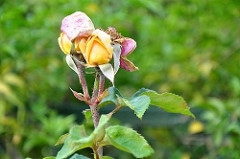

/content/drive/My Drive/flowers/tulip/6799076717_575944af91_m.jpg
Name of Flower:  tulip ↓ at index:  838


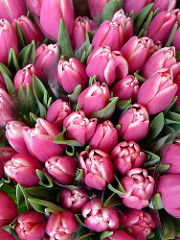

/content/drive/My Drive/flowers/daisy/4993492878_11fd4f5d12.jpg
Name of Flower:  daisy ↓ at index:  380


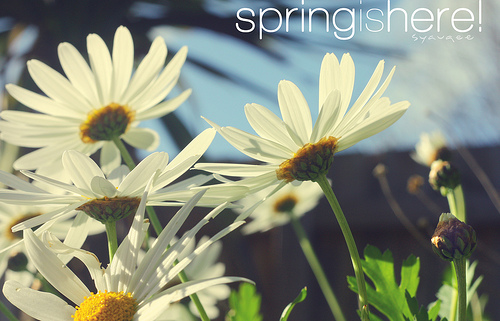

/content/drive/My Drive/flowers/dandelion/148180650_19a4b410db.jpg
Name of Flower:  dandelion ↓ at index:  530


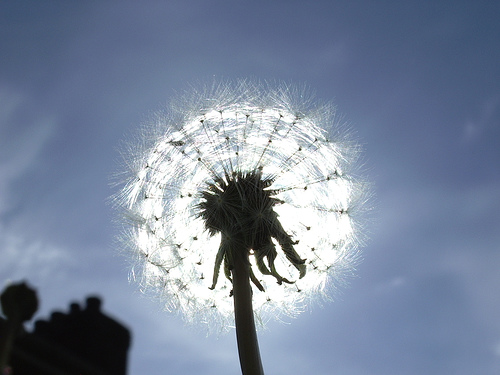

In [0]:
flower_path = "/content/drive/My Drive/flowers/"
flowers_dict = {}

for flower in os.listdir(flower_path):
    folder_path = os.path.join(flower_path, flower)
    flowers = os.listdir(folder_path)
    
    flowers_dict[flower] = [folder_path, flowers]
    img_idx = rand.randint(0,len(flowers)-1)
    flwr_img_path = os.path.join(flower_path, flower, flowers[img_idx])
    print(flwr_img_path)
    print('Name of Flower: ', flower, u'\u2193', 'at index: ', img_idx)
    display(Image(filename=flwr_img_path))

In [0]:
x_ = list()
y = list()
IMG_SIZE = 150
for i in os.listdir("/content/drive/My Drive/flowers/daisy"):
    try:
        path = "/content/drive/My Drive/flowers/daisy/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append('0')
    except:
        None
for i in os.listdir("/content/drive/My Drive/flowers/dandelion"):
    try:
        path = "/content/drive/My Drive/flowers/dandelion/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append('1')
    except:
        None
for i in os.listdir("/content/drive/My Drive/flowers/rose"):
    try:
        path = "/content/drive/My Drive/flowers/rose/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append('2')
    except:
        None
for i in os.listdir("/content/drive/My Drive/flowers/sunflower"):
    try:
        path = "/content/drive/My Drive/flowers/sunflower/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append('3')
    except:
        None
for i in os.listdir("/content/drive/My Drive/flowers/tulip"):
    try:
        path = "/content/drive/My Drive/flowers/tulip/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append('4')
    except:
        None
x_ = np.array(x_)

In [0]:
import pandas as pd
df =pd.DataFrame(list(zip(x_,y)),columns=['Image','category'])
df.head(5)


,Image,category
0,"[[[123, 130, 0], [119, 124, 1], [116, 119, 4],...",0
1,"[[[44, 90, 63], [28, 62, 40], [38, 49, 40], [4...",0
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
4,"[[[11, 19, 2], [9, 20, 0], [12, 25, 1], [13, 2...",0


In [0]:
print("Total number of flowers in the dataset: ", len(df))
fl_count = df['category'].value_counts()
print("Flowers in each category: ")
print(fl_count)

Total number of flowers in the dataset:  4363
Flowers in each category: 
1    1052
4     984
2     824
0     769
3     734
Name: category, dtype: int64


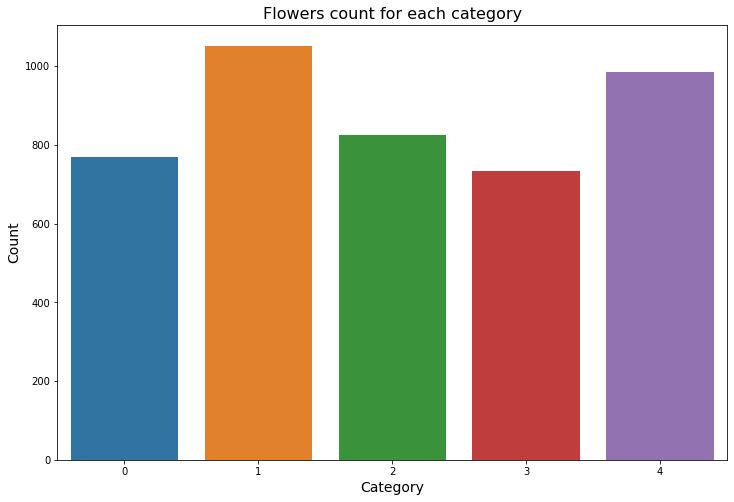

In [0]:
# Let's do some visualization too
plt.figure(figsize=(12,8))
sns.barplot(x=fl_count.index, y=fl_count.values)
plt.title("Flowers count for each category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

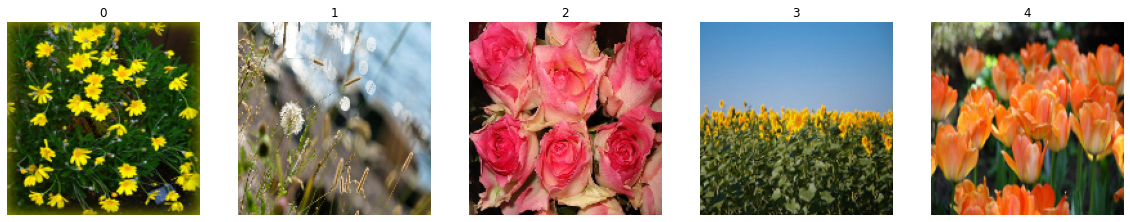

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
for i in range(5):
    img = x_[950*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y[950*i])

In [0]:
x_

array([[[[123, 130,   0],
         [119, 124,   1],
         [116, 119,   4],
         ...,
         [115, 119,   0],
         [118, 122,   0],
         [124, 127,   0]],

        [[117, 123,   0],
         [113, 117,   0],
         [108, 110,   0],
         ...,
         [111, 113,   4],
         [113, 116,   4],
         [117, 121,   1]],

        [[112, 117,   2],
         [108, 111,   3],
         [101, 105,   1],
         ...,
         [105, 106,   4],
         [109, 110,   4],
         [114, 117,   2]],

        ...,

        [[113, 119,   5],
         [104, 109,   1],
         [ 97, 103,   1],
         ...,
         [101, 103,   2],
         [104, 105,   1],
         [111, 115,   1]],

        [[117, 123,   1],
         [111, 115,   0],
         [106, 112,   1],
         ...,
         [105, 109,   0],
         [113, 116,   3],
         [118, 121,   1]],

        [[123, 128,   1],
         [118, 124,   1],
         [114, 119,   2],
         ...,
         [115, 118,   2],
        

In [0]:
# for replacement process i'll use keras.to_categorical 
from keras.utils.np_utils import to_categorical
y = to_categorical(y,num_classes = 5)

In [0]:
# test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_,y,test_size = 0.15,random_state = 42)

In [0]:
# validation and trains split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.15,random_state = 42)

Random image of every category in training dataset 

In [0]:
print('Shape of x_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)
print('*'*35)
print('Shape of x_test:', x_test.shape)
print('Shape of y_test:', y_test.shape)
print('*'*35)
print('Shape of x_val:', x_val.shape)
print('Shape of y_val:', y_val.shape)

Shape of x_train: (3151, 150, 150, 3)
Shape of y_train: (3151, 5)
***********************************
Shape of x_test: (655, 150, 150, 3)
Shape of y_test: (655, 5)
***********************************
Shape of x_val: (557, 150, 150, 3)
Shape of y_val: (557, 5)


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


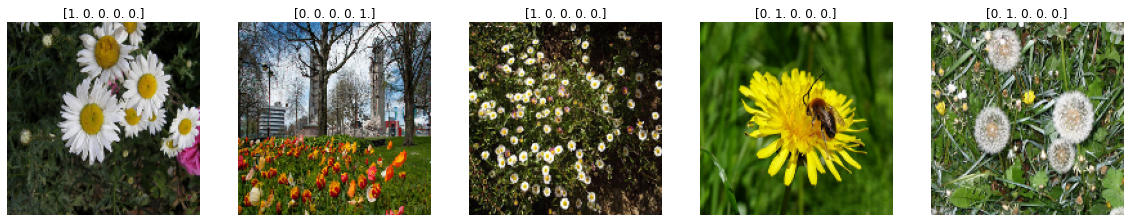

In [0]:
plt.figure(figsize = (20,20))
for i in range(5):
    img = x_train[600*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y_train[600*i])
plt.show()

# **Dense Nerual Network**

In [0]:
# First model is a dense neural network model with 5 layers
from tensorflow.keras import optimizers
model_1 = Sequential()
model_1.add(Dense(200, activation = "relu", input_shape = (150,150,3,)))
model_1.add(Dense(100, activation = "relu"))
model_1.add(Dense(60, activation = "relu"))
model_1.add(Dense(30, activation = "relu"))
model_1.add(Dense(10, activation = "relu"))
model_1.add(Flatten())
model_1.add(Dense(5, activation = "softmax"))

# Define the optimizer and compile the model
optimizer = optimizers.SGD(lr=0.03, clipnorm=5.)
model_1.compile(optimizer= optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

print (model_1.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 150, 150, 200)     800       
_________________________________________________________________
dense_17 (Dense)             (None, 150, 150, 100)     20100     
_________________________________________________________________
dense_18 (Dense)             (None, 150, 150, 60)      6060      
_________________________________________________________________
dense_19 (Dense)             (None, 150, 150, 30)      1830      
_________________________________________________________________
dense_20 (Dense)             (None, 150, 150, 10)      310       
_________________________________________________________________
flatten_4 (Flatten)          (None, 225000)            0         
_________________________________________________________________
dense_21 (Dense)             (None, 5)                

In [0]:
history = model_1.fit(x_train,y_train, batch_size = 32 ,epochs = 50 , validation_data =(x_val, y_val))

Train on 3151 samples, validate on 557 samples
Epoch 1/50
3151/3151 [==============================] - 207s 66ms/step - loss: 2.0493 - accuracy: 0.2142 - val_loss: 1.6014 - val_accuracy: 0.2513
Epoch 2/50
3151/3151 [==============================] - 211s 67ms/step - loss: 1.6024 - accuracy: 0.2355 - val_loss: 1.5989 - val_accuracy: 0.2513
Epoch 3/50
3151/3151 [==============================] - 206s 66ms/step - loss: 1.6014 - accuracy: 0.2355 - val_loss: 1.5980 - val_accuracy: 0.2513
Epoch 4/50
3151/3151 [==============================] - 207s 66ms/step - loss: 1.6009 - accuracy: 0.2355 - val_loss: 1.5975 - val_accuracy: 0.2513
Epoch 5/50
3151/3151 [==============================] - 213s 68ms/step - loss: 1.6009 - accuracy: 0.2355 - val_loss: 1.5972 - val_accuracy: 0.2513
Epoch 6/50
3151/3151 [==============================] - 206s 65ms/step - loss: 1.6008 - accuracy: 0.2355 - val_loss: 1.5971 - val_accuracy: 0.2513
Epoch 7/50
3151/3151 [==============================] - 206s 65ms/step 

In [0]:
print("Loss of the model is - " , model_1.evaluate(x_test,y_test)[0]*100 , "%")
print("Accuracy of the model is - " , model_1.evaluate(x_test,y_test)[1]*100 , "%")

655/655 [==============================] - 12s 19ms/step
Loss of the model is -  159.72859610128037 %
655/655 [==============================] - 12s 19ms/step
Accuracy of the model is -  25.954198837280273 %


In [0]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
Y_pred = model_1.predict(x_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_val,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
print('Classification Report: \n', classification_report(Y_true,Y_pred_classes))


Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.25      1.00      0.40       140
           2       0.00      0.00      0.00       110
           3       0.00      0.00      0.00        93
           4       0.00      0.00      0.00       123

    accuracy                           0.25       557
   macro avg       0.05      0.20      0.08       557
weighted avg       0.06      0.25      0.10       557



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


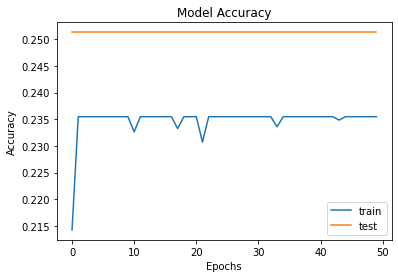

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# **CNN**

In [0]:
# # modelling starts using a CNN.
from keras.models import Sequential
from keras.layers import Dense
# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization


model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

In [0]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

# **Data Augmentation to prevent Overfitting**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=60,  # randomly rotate images in the range (60, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    ) 
datagen.fit(x_train)

In [0]:
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)       

**Fitting on the Training set and making predcitons on the Validation set**

In [0]:
history = model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                              epochs= epochs,validation_data=(x_val,y_val),
                              steps_per_epoch=x_train.shape[0] // batch_size
                              )

Epoch 1/50
24/24 [==============================] - 87s 4s/step - loss: 17.8504 - accuracy: 0.2627 - val_loss: 1.5582 - val_accuracy: 0.2478
Epoch 2/50
24/24 [==============================] - 86s 4s/step - loss: 1.4775 - accuracy: 0.3563 - val_loss: 1.3351 - val_accuracy: 0.4165
Epoch 3/50
24/24 [==============================] - 87s 4s/step - loss: 1.3800 - accuracy: 0.3837 - val_loss: 1.3279 - val_accuracy: 0.3878
Epoch 4/50
24/24 [==============================] - 87s 4s/step - loss: 1.3075 - accuracy: 0.4406 - val_loss: 1.1294 - val_accuracy: 0.4865
Epoch 5/50
24/24 [==============================] - 87s 4s/step - loss: 1.1970 - accuracy: 0.4906 - val_loss: 1.1130 - val_accuracy: 0.5476
Epoch 6/50
24/24 [==============================] - 87s 4s/step - loss: 1.1369 - accuracy: 0.5270 - val_loss: 1.0582 - val_accuracy: 0.5530
Epoch 7/50
24/24 [==============================] - 93s 4s/step - loss: 1.1100 - accuracy: 0.5459 - val_loss: 1.0044 - val_accuracy: 0.6122
Epoch 8/50
24/24 [=

**Evaluating the Model Performance**

In [0]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

655/655 [==============================] - 4s 7ms/step
Loss of the model is -  85.00676075465806 %
655/655 [==============================] - 4s 7ms/step
Accuracy of the model is -  70.68702578544617 %


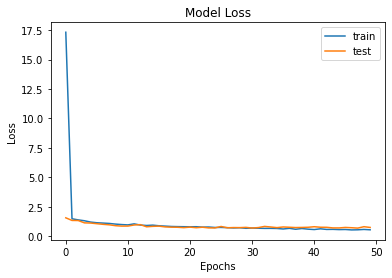

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

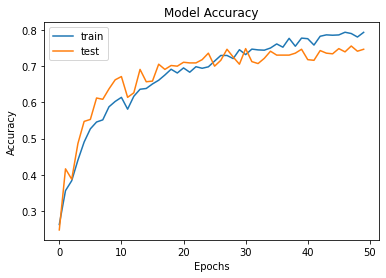

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_val,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
print('Classification Report: \n', classification_report(Y_true,Y_pred_classes))


Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.81      0.75        91
           1       0.81      0.81      0.81       140
           2       0.68      0.68      0.68       110
           3       0.71      0.86      0.78        93
           4       0.84      0.59      0.70       123

    accuracy                           0.75       557
   macro avg       0.75      0.75      0.74       557
weighted avg       0.76      0.75      0.74       557



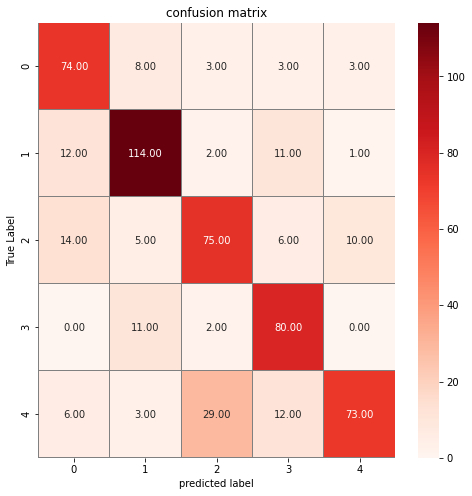

In [0]:
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

We see from confusion matrix that rose is most difficult to detect and sunflower is the easiest to detect.

ValueError: ignored

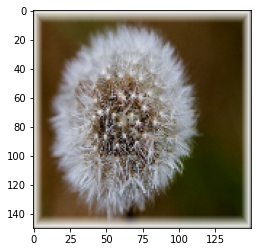

In [0]:
import numpy as np
idxtest=np.random.randint(len(x_test))
testImg=x_test[idxtest]
plt.imshow(testImg,cmap='gray')
testImg=testImg.reshape(1,150,150,3)
pred=le.inverse_transform(np.argmax(model.predict(testImg)))
actual=le.inverse_transform(np.argmax(y_test[idxtest]))
print("Actual:",actual," Predicted:",pred)
plt.show()